<a href="https://colab.research.google.com/github/GaneshKannanOfficial/BitcoinPrice_Prediction/blob/main/BitCoin_LinearReg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import yfinance as yf

In [2]:
df = yf.download('BTC-USD')

[*********************100%%**********************]  1 of 1 completed


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

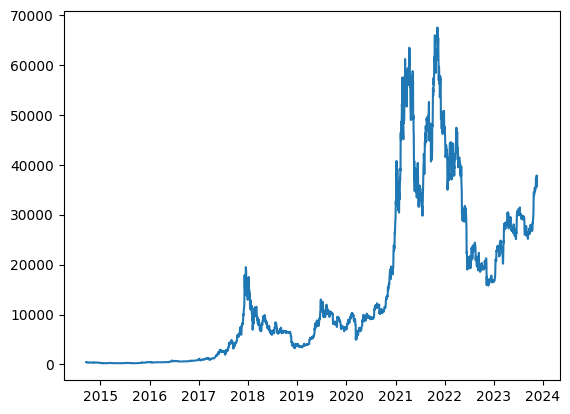

In [4]:
plt.plot(df.index,df['Adj Close'])

In [7]:
x = df[['Open','High','Low','Volume']]
y = df['Adj Close']

# Assuming x_train, x_test, y_train, y_test are already defined as per your previous code
row = int(len(x)*0.9)
x_train = x[:row]
x_test = x[row:]
y_train = y[:row]
y_test = y[row:]


In [8]:
# Create and fit the model
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()
linear_model.fit(x_train, y_train)

LinearRegression()

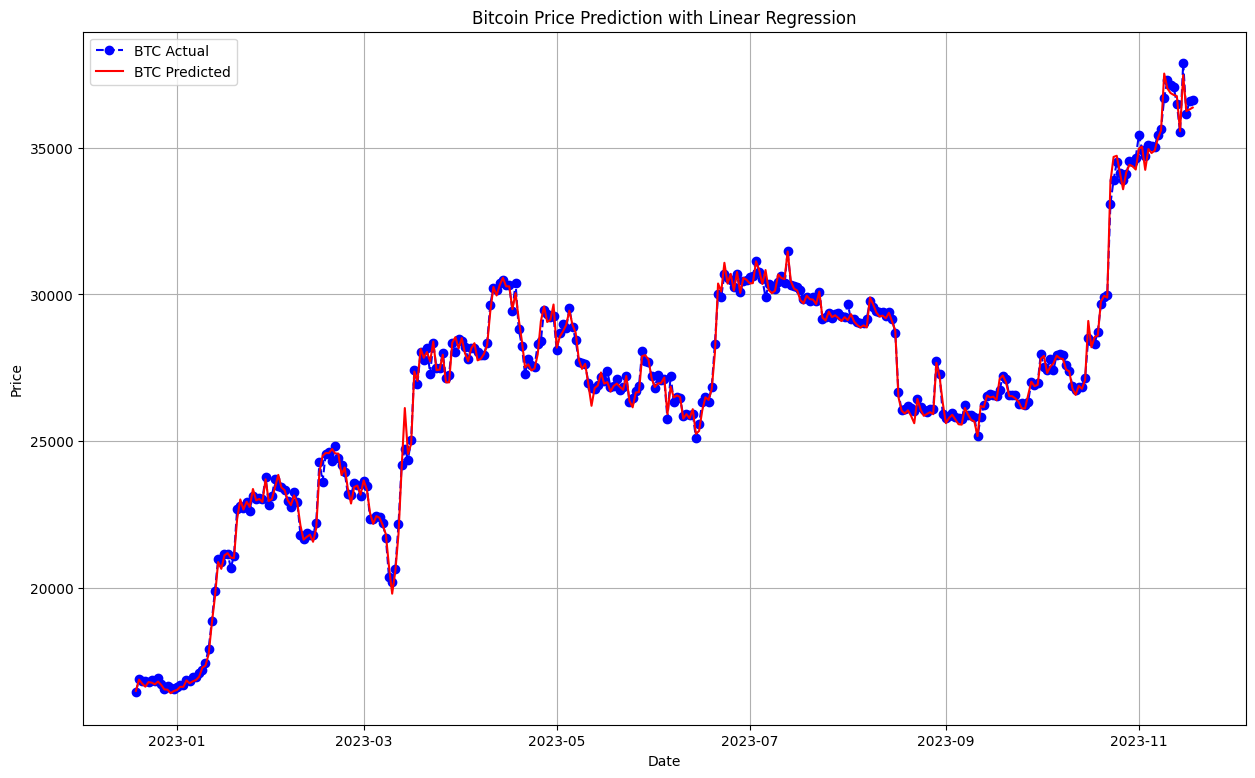

In [9]:
# Predicting the test set results
y_pred_linear = linear_model.predict(x_test)

# Plotting the results
plt.figure(figsize=(15, 9))
plt.grid(True)
plt.plot(df.index[row:], y_test, color='b', marker='o', linestyle='dashed', label='BTC Actual')
plt.plot(df.index[row:], y_pred_linear, color='r', label='BTC Predicted')
plt.title('Bitcoin Price Prediction with Linear Regression')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [10]:
# Evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
linear_rmse = np.sqrt(mean_squared_error(y_test, y_pred_linear))
linear_mae = mean_absolute_error(y_test, y_pred_linear)
linear_r2 = r2_score(y_test, y_pred_linear)

# Displaying metrics
metrics_df_linear = pd.DataFrame({
    'Metric': ['RMSE', 'MAE', 'R-squared (R2)'],
    'Value': [linear_rmse, linear_mae, linear_r2]
})
print(metrics_df_linear)

           Metric       Value
0            RMSE  224.825462
1             MAE  158.035960
2  R-squared (R2)    0.997370
